# Traffic in California by County - 2016

This was a simple exercise in practicing data cleaning and visualization. Caltrans measures traffic by counting the number of cars whic pass specific mile markers each day and averaging the total over 365 days. Traffic is counted in both directions. 

Orange County had the most daily traffic followed closely by Los Angeles County. As a current resident of one and a former resident of the other, this does not surprise me.

I used this relatively clean data to test out plotly's chorolpleth capabilities. I've discovered that plotly is much more powerful than matplotlib, but less dynamic than dashboard technologies like PowerBI. I will continue to use these choropleths if a project demands a map to be displayed in-line with coding.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import config
from config import user, apikey
plotly.tools.set_credentials_file(username=user, api_key=apikey)
import plotly.plotly as py
import plotly.figure_factory as ff
from IPython.display import Image

traffic_data = pd.read_csv("2016aadt.csv", encoding='ISO-8859-1')
county_abbrev = pd.read_csv("countyabbrev.csv", encoding='ISO-8859-1')
fips_finder = pd.read_csv("FIPS_CA.csv", encoding='ISO-8859-1')

In [3]:
#Isolate needed columns, group by county using average
traffic = traffic_data[["County", "Ahead AADT"]].dropna(how='any')
averages = traffic.groupby(["County"]).mean().reset_index()

averages.head()

,County,Ahead AADT
0,ALA,117664.383562
1,ALP,1708.000000
2,AMA,6959.756098
3,BUT,16949.361702
4,CAL,5280.217391


In [4]:
#Rename abbreviation dataframe for merge
abbrev = county_abbrev.rename(columns={
    "COUNTY": "County Name", 
    "ABBREV.":"County"})
abbrev.head()

,County Name,DISTRICT,County
0,Alameda,4,ALA
1,Alpine,10,ALP
2,Amador,10,AMA
3,Butte,3,BUT
4,Calaveras,10,CAL


In [5]:
merge_table = pd.merge(averages, abbrev, on="County")
average_traffic = merge_table[["County Name", "Ahead AADT"]]

average_traffic.loc[:,"County Name"] = average_traffic["County Name"].astype(str) + " County"
average_traffic.head()

,County Name,Ahead AADT
0,Alameda County,117664.383562
1,Alpine County,1708.000000
2,Amador County,6959.756098
3,Butte County,16949.361702
4,Calaveras County,5280.217391


## Top 5 Counties with Most Traffic

In [15]:
#Add FIPS
fips_adjust = fips_finder.rename(columns={"countyname": "County Name"})
traffic_fips = pd.merge(average_traffic, fips_adjust, on="County Name")

traffic_sort = traffic_fips.sort_values("Ahead AADT", ascending=False).reset_index(drop=True)
traffic_sort.head()

,County Name,Ahead AADT,FIPS
0,Orange County,158485.714286,6059
1,Los Angeles County,157618.237650,6037
2,Contra Costa County,133358.095238,6013
3,Alameda County,117664.383562,6001
4,Santa Clara County,113252.956989,6085


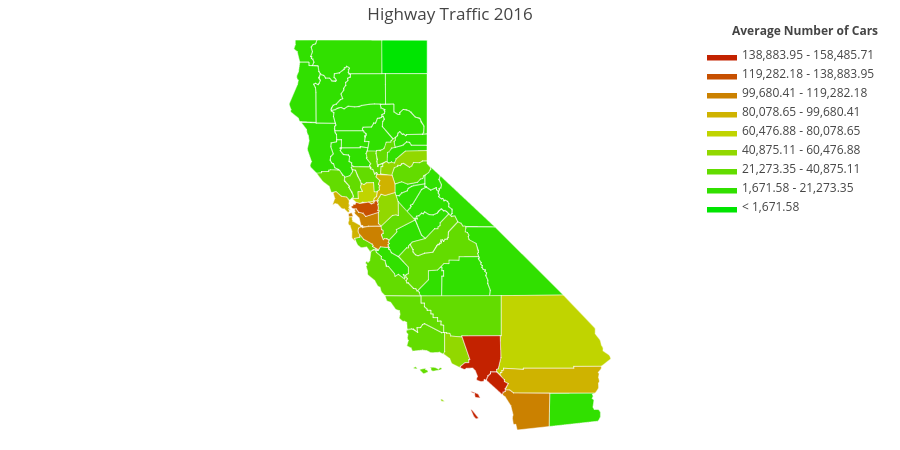

In [18]:
colorscale = ["00E501","31E000","63DC00","92D800","C0D400","CFB300","CB8100","C75000","C32200","BF0009"]    
    
endpts = list(np.linspace(average_traffic["Ahead AADT"].min(), average_traffic["Ahead AADT"].max(), len(colorscale) - 1))
fips = traffic_fips["FIPS"]
values = traffic_fips["Ahead AADT"]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], binning_endpoints=endpts, colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, show_state_data=False, show_hover=True,  
    centroid_marker={'opacity': 0}, asp=2.9, title='Highway Traffic 2016', legend_title='Average Number of Cars')

py.image.save_as(fig, filename='traffic.png')
Image('traffic.png')